In [221]:
import json
from datetime import datetime, time

from pymongo.mongo_client import MongoClient
import bson

import matplotlib.pyplot as plt

from pandas import DataFrame as df
def display_collection(collection):
    display(df(collection).drop("_id", axis=1))

* A partir du fichier trips_.json, remplacez les espaces des clés par un underscore, puis mettez en base en changeant les chaîne de caractères qui concerne des grandeurs numériques par le type integer ou float et les champs de date ($date) doit être sous format datetime.datetime. Ainsi les champs préfixé '$number...' suivent  l'exemple ci-dessous(cherchez du côté de la librairie bson, il existe une fonction utilitaire, il faut aussi réduire la profondeur):

```json
{'tripduration': {'$numberInt': "379"}}
```

en :

```json
{'tripduration': 379}
```



In [145]:
# On parse le fichie BSON avec la fonction bson.json_util.loads()
# Elle transformera les indices de type en type utilisable. 
# $numberInt -> int $date -> datetime, etc... 
# on peut les faire réapparaitre avec bson.json_util.dumps()
json_lines = []
with open("trips_.json", 'r') as file:
    for line in file:
        json_lines.append(bson.json_util.loads(line))

for i in range(3):
    print(json_lines[i])
    # print(bson.json_util.dumps(parsed_lines[i], json_options=bson.json_util.CANONICAL_JSON_OPTIONS))

{'tripduration': 307, 'start station id': 3118, 'start station name': 'McGuinness Blvd & Eagle St', 'end station id': 3119, 'end station name': 'Vernon Blvd & 50 Ave', 'bikeid': 23477, 'usertype': 'Subscriber', 'birth year': 1987, 'gender': 1, 'start station location': {'type': 'Point', 'coordinates': [-73.95284, 40.73555]}, 'end station location': {'type': 'Point', 'coordinates': [-73.95411749, 40.74232744]}, 'start time': datetime.datetime(2016, 1, 1, 7, 4, 31), 'stop time': datetime.datetime(2016, 1, 1, 7, 9, 38)}
{'tripduration': 3234, 'start station id': 500, 'start station name': 'Broadway & W 51 St', 'end station id': 337, 'end station name': 'Old Slip & Front St', 'bikeid': 20545, 'usertype': 'Customer', 'birth year': '', 'gender': 0, 'start station location': {'type': 'Point', 'coordinates': [-73.98336183, 40.76228826]}, 'end station location': {'type': 'Point', 'coordinates': [-74.00838676, 40.7037992]}, 'start time': datetime.datetime(2016, 1, 2, 8, 17, 50), 'stop time': dat

In [146]:
# Nettoyage des noms des clés avec python
parsed_lines = []
for line in json_lines:
    new_document = {}
    for k, v in line.items(): 
        new_document[k.replace(" ", "_")] = v
    parsed_lines.append(new_document)
    

# TODO: Nettoyage des noms des clé avec mongo. Si j'ai le temps

In [147]:
for i in range(3):
    print(parsed_lines[i])
    

{'tripduration': 307, 'start_station_id': 3118, 'start_station_name': 'McGuinness Blvd & Eagle St', 'end_station_id': 3119, 'end_station_name': 'Vernon Blvd & 50 Ave', 'bikeid': 23477, 'usertype': 'Subscriber', 'birth_year': 1987, 'gender': 1, 'start_station_location': {'type': 'Point', 'coordinates': [-73.95284, 40.73555]}, 'end_station_location': {'type': 'Point', 'coordinates': [-73.95411749, 40.74232744]}, 'start_time': datetime.datetime(2016, 1, 1, 7, 4, 31), 'stop_time': datetime.datetime(2016, 1, 1, 7, 9, 38)}
{'tripduration': 3234, 'start_station_id': 500, 'start_station_name': 'Broadway & W 51 St', 'end_station_id': 337, 'end_station_name': 'Old Slip & Front St', 'bikeid': 20545, 'usertype': 'Customer', 'birth_year': '', 'gender': 0, 'start_station_location': {'type': 'Point', 'coordinates': [-73.98336183, 40.76228826]}, 'end_station_location': {'type': 'Point', 'coordinates': [-74.00838676, 40.7037992]}, 'start_time': datetime.datetime(2016, 1, 2, 8, 17, 50), 'stop_time': dat

In [148]:
# Connexion à mongodb en localhost
connection = MongoClient() 
db = connection["operators"]
collection = db["trips"]


In [149]:
# on peut maintenant les insérer dans la base donnée.

collection.delete_many({}) 

collection.insert_many(parsed_lines)

InsertManyResult([ObjectId('688cb040dfa3a3d123bbda5d'), ObjectId('688cb040dfa3a3d123bbda5e'), ObjectId('688cb040dfa3a3d123bbda5f'), ObjectId('688cb040dfa3a3d123bbda60'), ObjectId('688cb040dfa3a3d123bbda61'), ObjectId('688cb040dfa3a3d123bbda62'), ObjectId('688cb040dfa3a3d123bbda63'), ObjectId('688cb040dfa3a3d123bbda64'), ObjectId('688cb040dfa3a3d123bbda65'), ObjectId('688cb040dfa3a3d123bbda66'), ObjectId('688cb040dfa3a3d123bbda67'), ObjectId('688cb040dfa3a3d123bbda68'), ObjectId('688cb040dfa3a3d123bbda69'), ObjectId('688cb040dfa3a3d123bbda6a'), ObjectId('688cb040dfa3a3d123bbda6b'), ObjectId('688cb040dfa3a3d123bbda6c'), ObjectId('688cb040dfa3a3d123bbda6d'), ObjectId('688cb040dfa3a3d123bbda6e'), ObjectId('688cb040dfa3a3d123bbda6f'), ObjectId('688cb040dfa3a3d123bbda70'), ObjectId('688cb040dfa3a3d123bbda71'), ObjectId('688cb040dfa3a3d123bbda72'), ObjectId('688cb040dfa3a3d123bbda73'), ObjectId('688cb040dfa3a3d123bbda74'), ObjectId('688cb040dfa3a3d123bbda75'), ObjectId('688cb040dfa3a3d123bbda

Après avoir mis en base et uniquement, assurez-vous qu'il n'y a pas de doublons, si il y en a, écrivez une fonction python permettant de les retirer (sans à avoir à faire de téléchargement)

In [150]:
# on detecte les doublons
duplicates = collection.aggregate([
    { "$group": {
        "_id": {
            "start_station_id": "$start_station_id", 
            "end_station_id": "$end_station_id", 
            "bikeid": "$bikeid", 
            "usertype": "$usertype", 
            "birth_year": "$birth_year", 
            "gender": "$gender", 
            "start_time": "$start_time", 
            "stop_time": "$stop_time"
        }, 
        "duplicate_count": {"$count": {}},
        "ids": {"$push": "$_id"} # on sauvegarde les ids pour les supprimer
    }},
    { "$match": { "duplicate_count" : {"$gt": 1}}},
    
    # Donne le nombre de total de doublons.
    # {"$group": { 
    #     "_id": "null", 
    #     "total": {"$sum": "$duplicate_count"}
    # }}
    # TODO: Trouver un moyen de faire un count sans obstruer le resultat de la requete
    
]).to_list()

total_duplicates = 0
for duplicate in duplicates:
    total_duplicates += duplicate["duplicate_count"]
    
print(f'il y a {total_duplicates} doublons')

il y a 31 doublons


In [151]:
# On les supprime les doublons 
deleted_count = 0
for duplicate in duplicates:
    res = collection.delete_many({"_id": { "$in": duplicate["ids"][1:]}}) # Tous sauf le premier
    deleted_count += res.deleted_count

print(f'{deleted_count} doublons ont été supprimés')

19 doublons ont été supprimés


In [152]:
# On devrait avoir 10000 documents
count = collection.aggregate([
    { "$count" : "document_count"}
])

print(count.next()['document_count'])

10000


De plus, des hypothèses d'incohérences ont été émises par les parties prenantes, il s'agit d'écrire pour chacune de ces hypothèses une fonction python qui va détecter les documents incriminés et les flagger avec un champs supplémentaire pour rectification/enquête ultérieure :

* Un vélo loué deux fois, mais la deuxième période de location démarre avant le rendu de la première période de location, ce qui n'est pas normal, ou tout autre chevanchement de période.
* Un utilisateur trop jeune (le service est réservé au + de 13 ans)
* La date de naissance n'est pas renseignée
* Des locations trop courtes (1 secondes)
* Des temps de location incohérents par rapport au start_time et au end_time


Faites un rapport détaillé des anomalies trouvées (nombres d'occurences)

In [153]:
# Velo loué plusieurs fois en même temps

res = collection.aggregate([
    {"$group": {
        "_id": "$bikeid", 
        "trip_count": {"$count": {}},
        "trips": {"$push": {
            "_id": "$_id",
            "start": "$start_time",
            "stop": "$stop_time"
        }}
    }},
    { "$match": {"trip_count": {"$gt": 1}}},
    { "$project": {
        "_id": 1,
        "trips": {"$sortArray": {"input": "$trips", "sortBy": {"start" : 1} }}
    }}
]).to_list()

trips_rented_before_end = set()
for bike in res:
    for i in range(len(bike['trips']) - 1):
        if bike["trips"][i]["stop"] > bike["trips"][i+1]["start"]:
            trips_rented_before_end.update([bike["trips"][i]["_id"],  bike["trips"][i+1]["_id"]])


res = collection.update_many(
    {"_id": {"$in": list(trips_rented_before_end)}}, 
    {"$push": {"anomaly": "bike_rented_before_end"}}
)

print(f'Documents flaggés "bike_rented_before_end": {res.modified_count}')

# TODO: faire tout en mongo ? si j'ai le temps


Documents flaggés "bike_rented_before_end": 3


In [154]:
# Utilisateur trop jeune (-13 ans)

res = collection.update_many(
    {
        "birth_year": {"$type": "int"},
        "$expr": { 
            "$gt": [ "$birth_year", { "$subtract": [ {"$year": "$$NOW"}, 13] } ]
        },
    }, 
    { "$push": { "anomaly": "below_13_years_old" }}
)    

print(f'Documents flaggés "below_13_years_old": {res.modified_count}')

Documents flaggés "below_13_years_old": 2


In [155]:
# Date de naissance manquante

birth_field_data = collection.aggregate([
    {"$group": {
        "_id": {"$type": "$birth_year"},
        "total": {"$count": {}}
    }}
]).to_list()
print(birth_field_data)

strings_values= collection.aggregate([
    {"$match": { 
        "$expr": { "$eq" : [
            {"$type": "$birth_year"}, 
            "string"
        ]}
    }},
    {"$group": {
        "_id": "$birth_year",
        "count": { "$count": {}}
    }}
])
print(strings_values.to_list())

int_values = collection.aggregate([
    {"$match": { 
        "$expr": { "$eq" : [
            {"$type": "$birth_year"}, 
            "int"
        ]}
    }},
    {"$group": {
        "_id": "$birth_year",
        "count": { "$count": {}}
    }},
    {"$sort" : {"_id": 1}}
])
print(int_values.to_list())

res = collection.update_many(
    {
        "$or": [
            {"birth_year": {"$eq": ""}},
            {"birth_year": {"$eq": 0}},
            {"birth_year": {"$eq": "null"}},
        ]
    }, 
    { "$push": {"anomaly": "missing_birth_year"}}
)

print(f'Documents flaggés "missing_birth_year": {res.modified_count}')


[{'_id': 'int', 'total': 8011}, {'_id': 'string', 'total': 1989}]
[{'_id': '', 'count': 1989}]
[{'_id': 1885, 'count': 3}, {'_id': 1936, 'count': 2}, {'_id': 1938, 'count': 6}, {'_id': 1939, 'count': 2}, {'_id': 1940, 'count': 6}, {'_id': 1941, 'count': 9}, {'_id': 1942, 'count': 16}, {'_id': 1943, 'count': 3}, {'_id': 1944, 'count': 10}, {'_id': 1945, 'count': 10}, {'_id': 1946, 'count': 19}, {'_id': 1947, 'count': 25}, {'_id': 1948, 'count': 24}, {'_id': 1949, 'count': 28}, {'_id': 1950, 'count': 38}, {'_id': 1951, 'count': 40}, {'_id': 1952, 'count': 52}, {'_id': 1953, 'count': 71}, {'_id': 1954, 'count': 85}, {'_id': 1955, 'count': 92}, {'_id': 1956, 'count': 96}, {'_id': 1957, 'count': 106}, {'_id': 1958, 'count': 115}, {'_id': 1959, 'count': 127}, {'_id': 1960, 'count': 150}, {'_id': 1961, 'count': 125}, {'_id': 1962, 'count': 153}, {'_id': 1963, 'count': 163}, {'_id': 1964, 'count': 99}, {'_id': 1965, 'count': 145}, {'_id': 1966, 'count': 122}, {'_id': 1967, 'count': 127}, {'_id

In [156]:
# locations trops courtes (1 seconde)
res = collection.update_many(
    {
        "$expr": { "$lte": [
            {"$subtract": [ "$stop_time", "$start_time" ]}, 
            1
        ]}
    }, {
        "$push": {"anomaly": "short_rent"}
    }
)

print(f'Document flaggés "short_rent": {res.modified_count}')

Document flaggés "short_rent": 4


In [157]:
# Temps de location incohérents (stop_time < start_time)

# ------DEBUGGING utility
# res = collection.aggregate([
#     {
#         "$project": {
#             "tripduration": {"$multiply": ["$tripduration", 1000]},
#             "elapsed": {"$subtract": ["$stop_time", "$start_time"]},
#         }
#     },
#     {
#         "$project": {
#             "dur": {"$abs": {"$subtract": ["$tripduration", "$elapsed"]}},
#         }
#     },
#     {
#         "$match": {
#             "dur": {"$gt": 2000}
#         }
#     }
# ]).to_list()
#
# for i in range(20):
#     print(res[i])

res = collection.update_many(
    {"$expr": {
        "$gt": [
            {
                "$abs": {
                    "$subtract": [
                        {"$multiply": ["$tripduration", 1000]},
                        {"$subtract": ["$stop_time", "$start_time"]}
                    ]}
            },
            1000 # Tolérance en ms, car la majorité de la base est off by 1 (5048) 
        ]
    }},
    {"$push": {"anomaly": "tripduration_mismatch"}}
)

print(f'Document flaggés "tripduration_mismatch": {res.modified_count}')

Document flaggés "tripduration_mismatch": 10


In [158]:
# Bilan des documents flaggés
res = collection.aggregate([
    {"$match": {"anomaly": {"$exists": True}}},
    {"$unwind": "$anomaly"},
    {"$group": {
        "_id": "$anomaly",
        "count": {"$count": {}}
    }}    
]).to_list()

print("Détails des anomalies:")
total = 0
for anomaly in res:
    total += anomaly["count"]
    print(f'{anomaly["_id"]}: {anomaly["count"]}')
    
print(f"{total} anomalies trouvées")  
#TODO: afficher le nobres de documents signalés

Détails des anomalies:
missing_birth_year: 1989
below_13_years_old: 2
tripduration_mismatch: 10
short_rent: 4
bike_rented_before_end: 3
2008 anomalies trouvées


Puis, après avoir fait un nettoyage et écarté les locations suspectes, répondez aux questions métier qui suivent :

* Changez le gender 0 en gender 1

In [159]:
res = collection.update_many(
    {"gender": {"$eq": 0}},
    {"$set": {"gender": 1}}
)

print(f'{res.modified_count} Documents modifiés')

2009 Documents modifiés


* Quels sont les 5 trajets (start station → end station) les plus fréquents pour les utilisateurs de genre féminin ? (gender = 1)

In [160]:
res = collection.aggregate([
    {"$match": { 
        "gender": 1, 
        # si on ne veut pas des trajets qui commencent et finissent aux même endroits
        # "$expr": {"$ne": ["$start_station_id", "$end_station_id"]}
    }},
    {"$group": {
        "_id": {
            "start_id": "$start_station_id",
            "end_id": "$end_station_id",
        },
        "start_station_name": {"$first": "$start_station_name"},
        "end_station_name": {"$first": "$end_station_name"},
        "cnt": {"$count": {}}
        # TODO: calculer le temps moyen de trajet. Si j'ai le temps par curiosité
    }},
    {"$sort": {"cnt": -1}},
    {"$limit": 5}
]).to_list()

to_display = []
for r in res:
    to_display.append({**r['_id'], **r}) # on récupère les id de stations
    
display_collection(to_display)

,start_id,end_id,start_station_name,end_station_name,cnt
0,2006,2006,Central Park S & 6 Ave,Central Park S & 6 Ave,30
1,3143,3168,5 Ave & E 78 St,Central Park West & W 85 St,12
2,3168,3168,Central Park West & W 85 St,Central Park West & W 85 St,11
3,3160,3160,Central Park West & W 76 St,Central Park West & W 76 St,10
4,3165,3168,Central Park West & W 72 St,Central Park West & W 85 St,9


* Quel est le nombre total de trajets par type d’utilisateur (Subscriber vs Customer) pour le premier jour de l'année ?

In [161]:
res = collection.aggregate([
    {"$match": {
        "$expr": {
            "$and": [
                {"$eq": [{"$dayOfMonth": "$start_time"}, 1]}, # $dayOfYear est une alternative
                {"$eq": [{"$month": "$start_time"}, 1]}
            ]
        }
    }},
    {"$group": {
        "_id": "$usertype",
        "trip_count": {"$count": {}}
    }}
]).to_list()

print("Nombre de trajet par usertype le 1er janvier de chaque année: ")
display(df(res))

Nombre de trajet par usertype le 1er janvier de chaque année: 


,_id,trip_count
0,Subscriber,4977
1,Customer,1372


* Quelle est la durée moyenne des trajets par station de départ pour les trajets commençant entre 7h et 9h ?

In [181]:
res = collection.aggregate([
    # TODO(maybe?): Exclure selon les anomalies pertinentes ? "short_rent", "bike_rent_before_end", ...
    {"$match": {
        "$expr": {
            "$and": [
                {"$gte": [{"$hour": "$start_time"}, 7]},
                {"$lt": [{"$hour": "$start_time"}, 9]}
            ]
        }
    }},
    {"$group": {
        "_id":  "$start_station_id",
        "start_station_name": {"$first": "$start_station_name"},
        "avg_time_s": {
            "$avg": {
                "$dateDiff": {
                    "startDate": "$start_time",
                    "endDate": "$stop_time",
                    "unit": "second"
                }
            }
        },
        # "avg_time_s": {"$avg": "$tripduration"},
    }},
    {"$sort": {"avg_time_s": -1}}
    # {"$limit": 10}
]).to_list()

res = df(res)
res["avg_time_s"] = res["avg_time_s"].round(2)
res["station_id"] = res["_id"]
display(res.drop("_id", axis=1))

,start_station_name,avg_time_s,station_id
0,W 31 St & 7 Ave,50139.00,379
1,E 20 St & Park Ave,19856.67,503
2,Riverside Blvd & W 67 St,4630.00,3173
3,Broadway & W 29 St,3846.00,486
4,W 39 St & 9 Ave,3798.67,488
...,...,...,...
224,W 13 St & 5 Ave,133.50,253
225,E 77 St & 3 Ave,108.00,3154
226,Stagg St & Union Ave,107.00,3077
227,Howard St & Centre St,91.00,268


* Quel est le top 3 des stations avec la plus forte fréquentation de prise de location, entre 6h et 8h ?

In [176]:
res = collection.aggregate([
    {"$match": { # Tous le trajets qui ont fréquenté une station entre 6 et 8 heures
        "$expr": {
            "$and": [
                {"$gte": [{"$hour": "$start_time"}, 6]},
                {"$lt": [{"$hour": "$start_time"}, 8]}
            ],
        }
    }},
    {"$group": { # on voudrais groupé par station_id (soit start, soit end)
        "_id":  "$start_station_id",
        "start_station_name": {"$first": "$start_station_name"},
        "trips_count": {"$count": {}}
    }},
    {"$sort": {"trips_count": -1}},
    {"$limit": 3}
]).to_list()

res = df(res)
display(res.drop("_id", axis=1))

,start_station_name,trips_count
0,W 33 St & 7 Ave,8
1,E 20 St & FDR Drive,8
2,Madison St & Clinton St,7


* Quelle est la durée médiane des trajets pour les + de 65 ans ?

In [273]:
res = collection.aggregate([
    # on peut filter en fonction de plusieurs anomalies
    {"$match": { "anomaly": {"$nin": ["missing_birth_year"]}}}, 
    {"$project": {
        "_id": 0,
        "tripduration": 1,
        "start_time": 1,
        "stop_time": 1,
        "age": {"$subtract": [
            {"$year": "$start_time"}, # On veut l'age au moment du trajet 
            "$birth_year"
        ]},
    }},
    {"$match": {"age": {"$gt": 65}}},
    {"$group": {
        "_id": None,
        "med": { "$median": {"input": "$tripduration", "method": "approximate"}},
        "med_diff": { # on peut aussi calculer la medianne avec start_time, stop_time
            "$median": {
                "input": {
                    "$dateDiff": { 
                        "startDate": "$start_time", 
                        "endDate": "$stop_time",
                        "unit": "second"
                    }
                },
                "method": "approximate"
            }
        }
    }},
]).to_list()

print(res)
print(f'La durée médiane des trajets pour les 65 ans est de {res[0]["med"]} secondes')

[{'_id': None, 'med': 506.0, 'med_diff': 506.0}]
La durée médiane des trajets pour les 65 ans est de 506.0 secondes


* Quelle est la répartition des trajets (nombre de trajets) par tranche horaire de 2 heures (faire visualisation, 0h-2h, 2h-4h etc..) ?

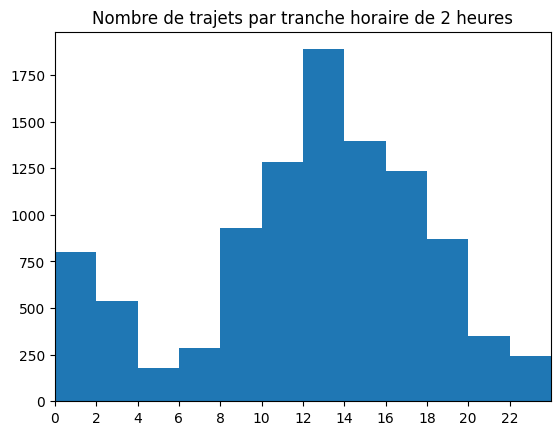

In [ ]:
res = collection.aggregate([
    {"$project": { "hour": {"$hour": "$start_time"}}},
    # Existe-t-il un moyen de faire un group par x heures ?
    # {"$group": {"_id": "$hour", "count": {"$count": {}}}},
]).to_list()

# Plot permet d'afficher directement le résultat
# TODO: trouver un moyen d'afficher les valeurs au niveau des histos
df(res).hist(bins=range(0, 26, 2), grid=False)
plt.xlim(0, 24)
plt.xticks(range(0, 24, 2))
plt.title("Nombre de trajets par tranche horaire de 2 heures")
plt.show()

* Quel est le temps moyen passé en trajet pour chaque genre, filtré sur les trajets de plus de 10 minutes ?

In [263]:
res = collection.aggregate([
    {"$match": { "tripduration": {"$gte": 10*60}}},
    {"$group": {
        "_id": "$gender",
        "avg_time": {"$avg": "$tripduration"}
    }}
]).to_list()

res = df(res)
res = res.rename(columns={"_id": "Gender", "avg_time": "Average Time"})
display(res)

,Gender,Average Time
0,2,1346.546275
1,1,2095.858079


* Combien de trajets ont démarré pour chaque station pendant les heures de pointe (ex. 7h-9h et 17h-19h) ?

In [270]:
res = collection.aggregate([
    {"$match": {
        "$expr": {
            "$or": [
                { "$and": [
                    {"$gte": [{"$hour": "$start_time"}, 7]},
                    {"$lt": [{"$hour": "$start_time"}, 9]}
                ]},
                { "$and": [
                    {"$gte": [{"$hour": "$start_time"}, 17]},
                    {"$lt": [{"$hour": "$start_time"}, 19]}
                ]},
            ]
        }
    }},
    {"$group": {
        "_id": "$start_station_id",
        "station_name": {"$first": "$start_station_name"},
        "cnt": {"$count": {}}
    }},
    {"$sort": {"cnt": -1}}
]).to_list()

res = df(res).rename(columns={"_id": "station_id", "cnt": "Count"})
display(res)

,station_id,station_name,Count
0,519,Pershing Square North,19
1,453,W 22 St & 8 Ave,16
2,2006,Central Park S & 6 Ave,15
3,528,2 Ave & E 31 St,14
4,509,9 Ave & W 22 St,14
...,...,...,...
361,3121,Jackson Ave & 46 Rd,1
362,3155,Lexington Ave & E 63 St,1
363,456,E 53 St & Madison Ave,1
364,3105,N 15 St & Wythe Ave,1


* Quel est l'âge le plus courant pour les locations de 18h à 20h ?

In [271]:
res = collection.aggregate([
    {"$match": { "anomaly": {"$nin": ["missing_birth_year"]}}}, 
    {"$match": {
        "$expr": {
            "$and": [
                {"$gte": [{"$hour": "$start_time"}, 18]},
                {"$lt": [{"$hour": "$start_time"}, 20]}
            ],
        }
    }},
    {"$project": {
        "age": { "$subtract": [{"$year": "$start_time"}, "$birth_year"]}
    }},
    {"$group": {"_id": "$age", "cnt": {"$count": {}}}},
    {"$sort": {"cnt": -1}},
    {"$limit": 1}
]).to_list()

res = df(res)
res = res.rename(columns={"_id": "Age", "cnt": "Count"})
display(res)

,Age,Count
0,32,35
